# Lineaarinen ja logistinen regressio

## Tavoitteet
Tavoitteena on ennustaa talon hintaa per neliömetri New Taipei City, Taiwanissa. Käytämme mallinnuksessa lineaarista ja logistista regressiota. Tutkimme datasetistä löytyviä talojen arvoja ja käytämmä näitä koneoppimismallien kouluttamiseen ja testaamiseen.


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)
# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets
# metadata
print(real_estate_valuation.metadata)
# variable information
print(real_estate_valuation.variables)

{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'title': 'Building real estate valuation models with comparative approach through case-based reasoning', 'authors': 'I. Yeh, Tzu-Kuang Hsu', 'published_

In [2]:
X.describe(include="all")

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


## Datan kuvaus
Datasetti pitää sisällään erilaisia tietoja taloista Taiwanissa. Datasetti sisältää seuraavat sarakkeet:
- X1 transaction date: Talon myynnin päivämäärä
- X2 house age: Talon ikä
- X3 distance to the nearest MRT station: Etäisyys lähimpään metroasemaan
- X4 number of convenience stores: Lähellä olevien ruokakauppojen määrä
- X5 latitude: Talon leveysaste
- X6 longitude: Talon pituusaste

Näillä arvoilla tavoitteenamme on ennustaa talon hintaa per neliömetri.


## Datan esikäsittely
Datasetti pitää jakaa testi- ja koulutusdataan.
Datasetti sisältää omnia eri-kokoisia arvoja, joten skaalaamme datasetin ennen mallinnusta. Käytämme StandardScaleria, joka skaalaa arvot keskihajonnan ja keskiarvon mukaan. Tämä on tärkeää, koska lineaarinen ja logistinen regressio ovat herkkiä eri-kokoisille arvoille.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
#datan skaalaus
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.001128,2.344015,-0.823965,0.968042,-0.147066,0.455057
1,0.296351,-0.821281,0.951418,-0.049170,-0.743117,-1.355926
2,-1.777321,-0.900856,0.917224,-0.388241,-0.504055,-1.427483
3,-0.297651,1.707419,-0.469361,1.307112,0.065523,0.739277
4,0.890353,-0.865489,-0.345357,0.289900,0.260463,0.953278
...,...,...,...,...,...,...
326,-0.297651,1.610161,-0.344436,-0.388241,0.505141,0.218319
327,-0.297651,-0.007853,-0.715479,1.307112,0.620661,0.614889
328,0.591573,-0.573716,-0.663621,-1.066382,0.422512,-0.229077
329,-1.186876,-1.121896,-0.657800,0.628971,0.522789,0.753990


## Mallinnus

In [5]:
# linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
beta0 = model.intercept_
beta1 = model.coef_
print("beta0:", + beta0)
print("beta1:", + beta1)

beta0: [38.39154079]
beta1: [[ 1.52963113 -3.06269441 -5.78692561  3.2188727   2.85510785 -0.4410086 ]]


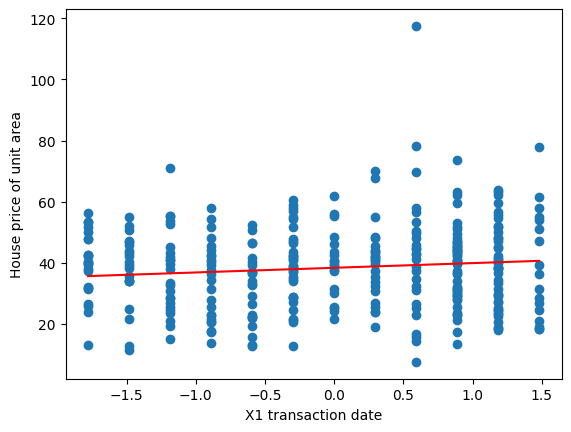

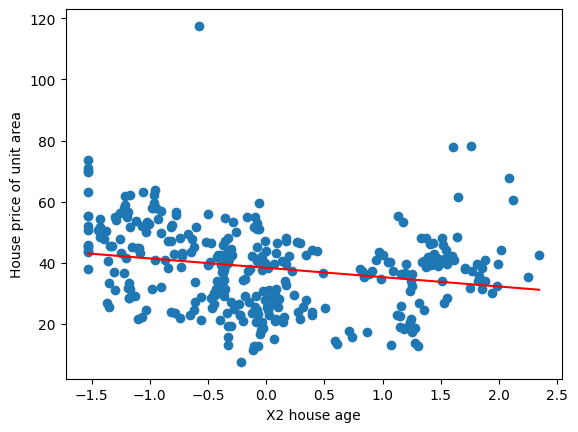

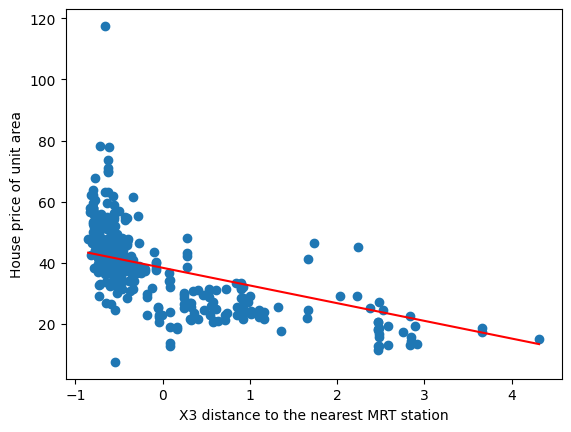

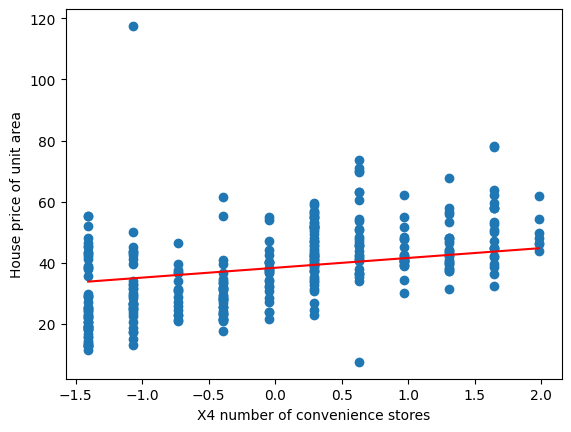

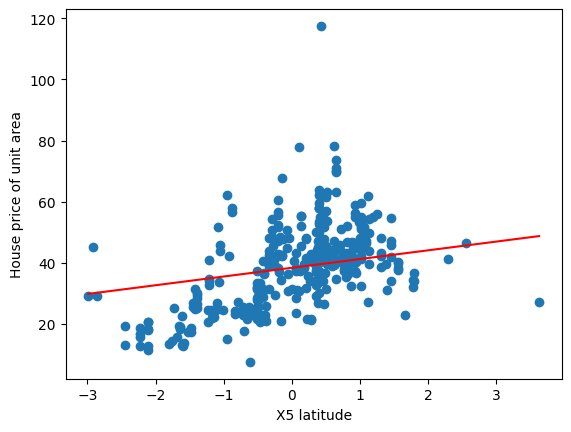

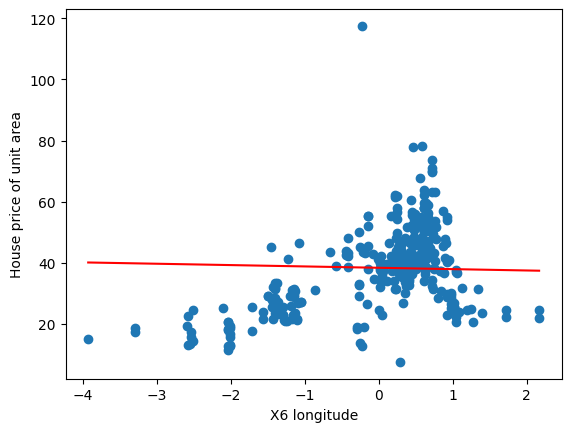

In [16]:
from matplotlib import pyplot as plt
i = 0
for feature in X_train.columns:
    plt.scatter(X_train[feature], y_train)
    xs = np.linspace(min(X_train[feature]), max(X_train[feature]), 331)
    ys = beta0 + beta1[0][i] * xs
    i += 1
    plt.plot(xs, ys, color='red')
    plt.xlabel(feature)
    plt.ylabel('House price of unit area')
    plt.show()

In [6]:
# logistic regression


ValueError: operands could not be broadcast together with shapes (1,6) (100,) 

## Arviointi

## Käyttöönotto
Ennustukset voisivat olla hyödyllisiä esimerkiksi kiinteistövälittäjille tai ihmisille, jotka haluavat myydä omia kiinteistöjä. Datasetti perustuu juuri New Taipei Cityyn, joten ennustukset pätevät tarkasti ainoastaan tähän kaupunkiin. Ennustuksille tarvittaisiin luultavasti oma sovellus tai nettisivu, joka tarjoisi käyttäjälle helpon käyttäjäkokemuksen. Jos sovellusta haluttaisiin laajentaa, tarvittaisiin lisää dataa eri kaupungeille.